In [1]:
#import libraries
import numpy as np
import pprint
import scipy
import scipy.linalg
import pandas as pd
import random
import csv
import gzip
import seaborn as sns
from collections import OrderedDict
from scipy.linalg import svd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json
from tqdm import tqdm
from collections import defaultdict
from surprise import Reader, Dataset, accuracy
from surprise.model_selection import cross_validate, GridSearchCV
from surprise.prediction_algorithms import SVD, SVDpp, KNNBasic, KNNBaseline, KNNWithMeans, BaselineOnly
from surprise.model_selection import train_test_split
np.set_printoptions(threshold=20)
pd.options.mode.copy_on_write = True
from ipynb.fs.full.SVD_FUNCTIONS import csv_to_df
from ipynb.fs.full.SVD_FUNCTIONS import Convert_to_Matrix
from ipynb.fs.full.SVD_FUNCTIONS import LU_Factorization
from ipynb.fs.full.SVD_FUNCTIONS import find_similar
from ipynb.fs.full.SVD_FUNCTIONS import get_most_frequent_users
from ipynb.fs.full.SVD_FUNCTIONS import get_users_with_minimal_ratings
from ipynb.fs.full.SVD_FUNCTIONS import get_training_data
from ipynb.fs.full.SVD_FUNCTIONS import pivot_rating_to_user_frame
from ipynb.fs.full.SVD_FUNCTIONS import do_svd
from ipynb.fs.full.SVD_FUNCTIONS import plot_data

from ipynb.fs.full.SVD_FUNCTIONS import recommend
from ipynb.fs.full.SVD_FUNCTIONS import get_tier_list
from ipynb.fs.full.SVD_FUNCTIONS import get_individual_user_data
from ipynb.fs.full.SVD_FUNCTIONS import print_user_data


In [2]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    

In [3]:
books_ratings_cleaned, book_dict = csv_to_df("Books_rating.csv", "books_data.csv")

In [4]:
df = pd.read_csv('ratings_user_tagged.csv.gzip', compression='gzip')
drop_column = ["Unnamed: 0"]
df_cleaned = df.drop(drop_column, axis=1)
columns_titles = ["User_id","book_id", "review/score"]
svd_columns_titles = ["book_id","User_id","review/score"]
df_cleaned = df_cleaned.reindex(columns=columns_titles)
df_svd_cleaned = df_cleaned.reindex(columns=svd_columns_titles)
df_cleaned.head()
df_svd_cleaned.head()

,book_id,User_id,review/score
0,0826414346,A30TK6U7DNS82R,5.0
1,0826414346,A2MVUWT453QH61,4.0
2,0826414346,A2F6NONFUDB6UK,4.0
3,0826414346,A14OJS0VWMOSWO,5.0
4,0829814000,A373VVEU6Z9M0N,5.0


In [5]:
len(df_cleaned['book_id'].unique())

92327

In [6]:
len(df_cleaned['User_id'].unique())

6842

In [7]:
#EXCUTE ME PLEASE FOR REAL IM DYING
#LIKE REALLY, RUN ME
training_data, test_data = get_training_data(0.80, df_svd_cleaned)

100%|██████████████████████████████████████████████████████████████████████████| 81207/81207 [00:08<00:00, 9100.34it/s]


In [8]:
A = training_data.fillna(0)
B = test_data.fillna(0)

In [9]:
B.shape

(6831, 34591)

In [10]:
column_names = list(A.columns)
row_names = list(A.transpose().columns)

user = 10

In [11]:
#plot_data(Vt.transpose(), "Item")

In [12]:
USERBOOK = df_cleaned

reader = Reader()
data = Dataset.load_from_df(USERBOOK, reader)


In [15]:
#Run SVD Algorithm
#algo = SVD(random_state=0, n_factors=100, n_epochs=100, verbose=True)
SVD(n_factors= 100, n_epochs= 200, biased= True, lr_all= 0.005, reg_all= 0, init_mean= 0, init_std_dev= 0.01)

# Run 5-fold cross-validation and print results.
cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing

{'test_rmse': array([0.78686572, 0.78680125, 0.7935642 , 0.7877904 , 0.78872882]),
 'fit_time': (28.334277868270874,
  29.2453293800354,
  28.783266305923462,
  28.619099617004395,
  28.628732204437256),
 'test_time': (0.8218851089477539,
  0.7177028656005859,
  0.6999011039733887,
  0.7371988296508789,
  0.7173409461975098)}

In [31]:
trainset, testset = train_test_split(data, test_size=0.20)
algo.fit(trainset)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing

0.789238055857755

In [43]:
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [44]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
0,AUXAPV021707G,B000GWE3JG,5.0,5.0,{'was_impossible': False},32,7,0.0
38730,A1VWSR1H2Y67UD,B000Q91194,5.0,5.0,{'was_impossible': False},20,55,0.0
38742,AFVQZQ8PW0L,0425199185,5.0,5.0,{'was_impossible': False},2758,11,0.0
38756,A3OL1AX1IODBYL,B0007F8AO6,5.0,5.0,{'was_impossible': False},69,71,0.0
70453,A1426KH3FP7F1R,B00005WL4N,5.0,5.0,{'was_impossible': False},22,8,0.0
6734,A34989LDU92LBH,B000L28LS0,5.0,5.0,{'was_impossible': False},59,51,0.0
38796,AOZR3E3L82TH2,0821776134,5.0,5.0,{'was_impossible': False},69,4,0.0
70441,A2VD3CYOEMJ6SR,B000IOPY3G,5.0,5.0,{'was_impossible': False},95,10,0.0
38802,AEE2GJR0VF6R7,B0007DRGI4,5.0,5.0,{'was_impossible': False},57,293,0.0
38816,AYT4LRNRMCVT5,1423310772,5.0,5.0,{'was_impossible': False},45,18,0.0


In [45]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
52576,AS5ERWDSXRDNX,B000HOMU2U,1.0,5.0,{'was_impossible': False},41,14,4.0
54599,A3PK2LTN51JAMF,B0007K1SHW,1.0,5.0,{'was_impossible': False},26,3,4.0
35864,A3LGZZMZHP8EFG,B000KYIFEY,1.0,5.0,{'was_impossible': False},50,4,4.0
56655,A15Q7ABIU9O9YZ,B000GS98YU,1.0,5.0,{'was_impossible': False},98,16,4.0
66518,A1EDLI3D8MOSUA,0312263805,1.0,5.0,{'was_impossible': False},18,6,4.0
26443,A1L43KWWR05PCS,B000PYGZ82,1.0,5.0,{'was_impossible': False},536,1,4.0
34024,A28E2RRUXWICXS,B000Q751EM,1.0,5.0,{'was_impossible': False},18,42,4.0
21233,A2KUPHNY30CRYG,B0006C2SC0,1.0,5.0,{'was_impossible': False},48,17,4.0
24587,AC6VWCWB4JEDL,0752804553,1.0,5.0,{'was_impossible': False},48,1,4.0
15824,A1IIX764GG3WNZ,1562014838,1.0,5.0,{'was_impossible': False},140,15,4.0


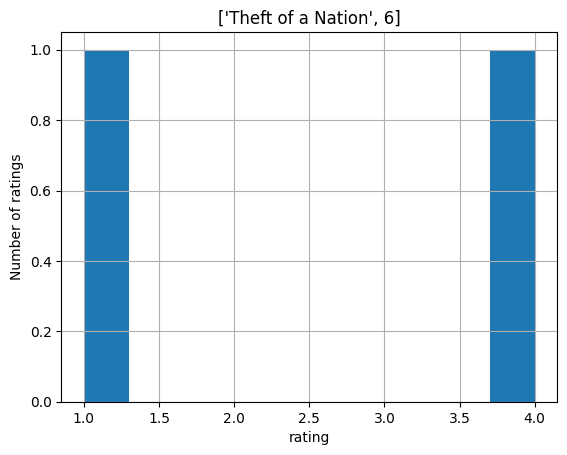

In [46]:
%matplotlib inline
var = '0910643008'
df_cleaned.loc[df_cleaned['book_id'] == var]['review/score'].hist()
plt.xlabel('rating')
plt.ylabel('Number of ratings')
plt.title(book_dict.get(var))
plt.show()

In [47]:
#dataset = data.build_full_trainset()
#svd = SVD(n_factors=10, reg_all=0.02)
#svd.fit(dataset)

In [48]:
def get_top_n(predictions, n):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
            user_ratings.sort(key=lambda x: x[1], reverse=True)
            top_n[uid] = user_ratings[:n]
    return top_n

In [49]:
top_n = get_top_n(predictions, n=5)
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

AUXAPV021707G ['B000GWE3JG', 'B000OZRZ90', 'B000MCJWZ0', 'B00085U4D0', '0877549249']
AJ98YA4Y333BK ['B000NXANMO', 'B000N28H2I', 'B0006ASAM4', 'B000PX5UZC', 'B000J6DLBU']
A3R1D7LZUJ2H6H ['019283357X', 'B000N55570', 'B000GPT7VC', 'B000JJPPSE', '1593073194']
A2FG29CGPQV29N ['B000KU50DC', 'B000L41DC4', '0553569112', '0553569104', '0743497457']
A1C4PZDQ84I9MA ['0312360142', '031611488X', 'B0000YSH2E', '0689830173', '0521011698']
A1YWUHRJDMATPI ['B000EDPL84', 'B0000B194M', 'B000GRSR4S', 'B0006ARW8M', 'B000GYYHEA']
A2VE83MZF98ITY ['1581180012', 'B000L6EE8M', '0060765461', '0873529863', 'B00087NVWY']
A85U2348T7IIJ ['0316163163', 'B00009RB0I', '1569314063', '015600710X', '1892213095']
A15549JZ1YLTGH ['2266014099', 'B000MCEXR2', 'B0000CHQ0X', 'B0006AI088', '1556856679']
A182S2RY07ZBJE ['0694520187', 'B000KPF11S', 'B000PX5UZC', '0691000670']
A2B98MIGNP4DNF ['0143057804', 'B0006BRDX0', '0312332874', 'B000JNFVGQ', '0805073566']
A3MCQSIBV7QW8Q ['B0007K77D6', 'B000Q08CDQ', '0345461967', 'B000Q9I494',

In [50]:
#plot_data(algo.pu, "User")

In [51]:
predictions

[Prediction(uid='AUXAPV021707G', iid='B000GWE3JG', r_ui=5.0, est=5, details={'was_impossible': False}),
 Prediction(uid='AJ98YA4Y333BK', iid='1594200742', r_ui=5.0, est=4.2196005595847375, details={'was_impossible': False}),
 Prediction(uid='A3R1D7LZUJ2H6H', iid='068983375X', r_ui=5.0, est=4.907309363711619, details={'was_impossible': False}),
 Prediction(uid='A2FG29CGPQV29N', iid='B00005VPKM', r_ui=4.0, est=3.602410730387026, details={'was_impossible': False}),
 Prediction(uid='A1C4PZDQ84I9MA', iid='0521011698', r_ui=5.0, est=4.4892943725617735, details={'was_impossible': False}),
 Prediction(uid='A1YWUHRJDMATPI', iid='B000GRORC4', r_ui=4.0, est=4.450466370549866, details={'was_impossible': False}),
 Prediction(uid='A2VE83MZF98ITY', iid='B000MOM8IQ', r_ui=5.0, est=4.888645784023904, details={'was_impossible': False}),
 Prediction(uid='A85U2348T7IIJ', iid='0316163163', r_ui=2.0, est=4.403415071857015, details={'was_impossible': False}),
 Prediction(uid='A15549JZ1YLTGH', iid='2266014099

In [52]:
pred = algo.predict(row_names[user], '0140193421', r_ui=5, verbose=True)

user: A17A1KTVI3DG6U item: 0140193421 r_ui = 5.00   est = 4.80   {'was_impossible': False}


In [53]:
prediction_list = []

for i in range(len(predictions)):
    prediction_list.append(predictions[i])

prediction_list

[Prediction(uid='AUXAPV021707G', iid='B000GWE3JG', r_ui=5.0, est=5, details={'was_impossible': False}),
 Prediction(uid='AJ98YA4Y333BK', iid='1594200742', r_ui=5.0, est=4.2196005595847375, details={'was_impossible': False}),
 Prediction(uid='A3R1D7LZUJ2H6H', iid='068983375X', r_ui=5.0, est=4.907309363711619, details={'was_impossible': False}),
 Prediction(uid='A2FG29CGPQV29N', iid='B00005VPKM', r_ui=4.0, est=3.602410730387026, details={'was_impossible': False}),
 Prediction(uid='A1C4PZDQ84I9MA', iid='0521011698', r_ui=5.0, est=4.4892943725617735, details={'was_impossible': False}),
 Prediction(uid='A1YWUHRJDMATPI', iid='B000GRORC4', r_ui=4.0, est=4.450466370549866, details={'was_impossible': False}),
 Prediction(uid='A2VE83MZF98ITY', iid='B000MOM8IQ', r_ui=5.0, est=4.888645784023904, details={'was_impossible': False}),
 Prediction(uid='A85U2348T7IIJ', iid='0316163163', r_ui=2.0, est=4.403415071857015, details={'was_impossible': False}),
 Prediction(uid='A15549JZ1YLTGH', iid='2266014099

In [54]:
prediction_array = np.asarray(prediction_list)
prediction_array = np.delete(prediction_array, 4, 1)
prediction_array

array([['AUXAPV021707G', 'B000GWE3JG', 5.0, 5],
       ['AJ98YA4Y333BK', '1594200742', 5.0, 4.2196005595847375],
       ['A3R1D7LZUJ2H6H', '068983375X', 5.0, 4.907309363711619],
       ...,
       ['A2I17T9XB6LSGW', '0441011837', 4.0, 3.7196946860997793],
       ['A3MV1KKHX51FYT', 'B000JT3KBS', 5.0, 4.917762057225156],
       ['A342BV4226SM5Y', 'B000N63PU8', 2.0, 3.146576070483966]],
      dtype=object)

In [55]:
with open('predictions.csv', "w") as csv_file:
        writer = csv.writer(csv_file, delimiter=',')
        for line in prediction_array:
            writer.writerow(line)

In [56]:
book_dict.get('B000MUBERQ')

['The Turkish Language Reform: A Catastrophic Success (Oxford Linguistics)', 8]

In [63]:
# Reconstruction of original matrix
#original = np.zeros((trainset.n_users, trainset.n_items))
#for (u, i, r) in trainset.all_ratings():
#    original[u][i] = r

# Plot matrix
#fig, ax = plt.subplots(figsize=(10, 10))
#sns.heatmap(original, ax=ax)
#ax.set_title("Original Matrix", fontsize = 16)
#ax.set_xlabel('item', fontsize = 12)
#ax.set_ylabel('user', fontsize = 12)
#plt.show()

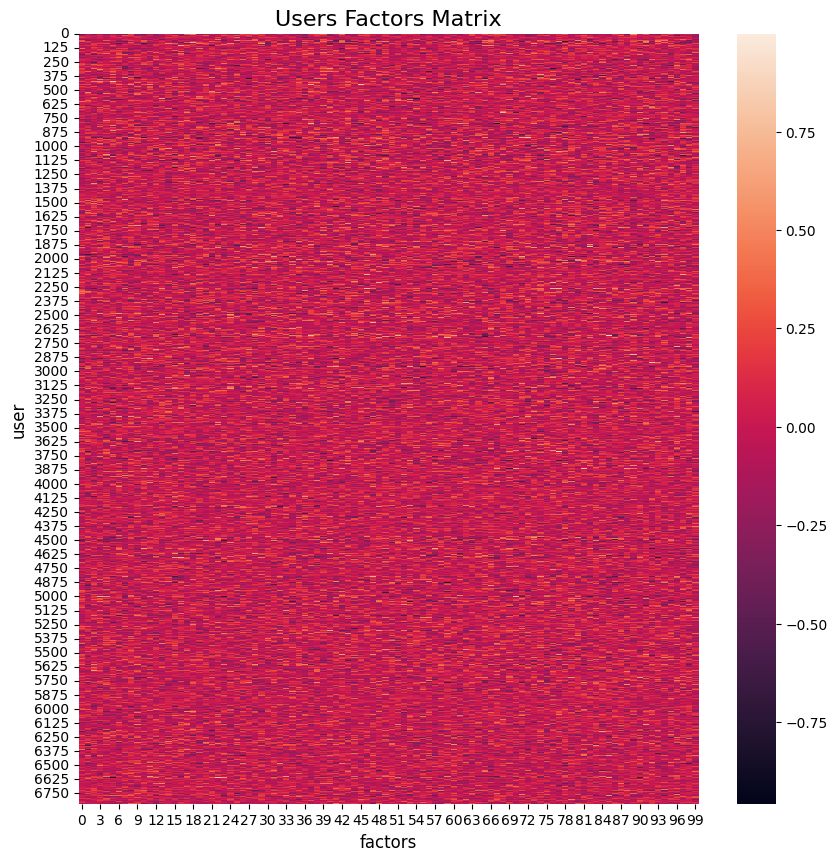

In [58]:
# Users factors matrix with 5 factors
pu = algo.pu

# Plot users factors
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pu, ax=ax)
ax.set_title("Users Factors Matrix", fontsize = 16)
ax.set_xlabel('factors', fontsize = 12)
ax.set_ylabel('user', fontsize = 12)
plt.show()

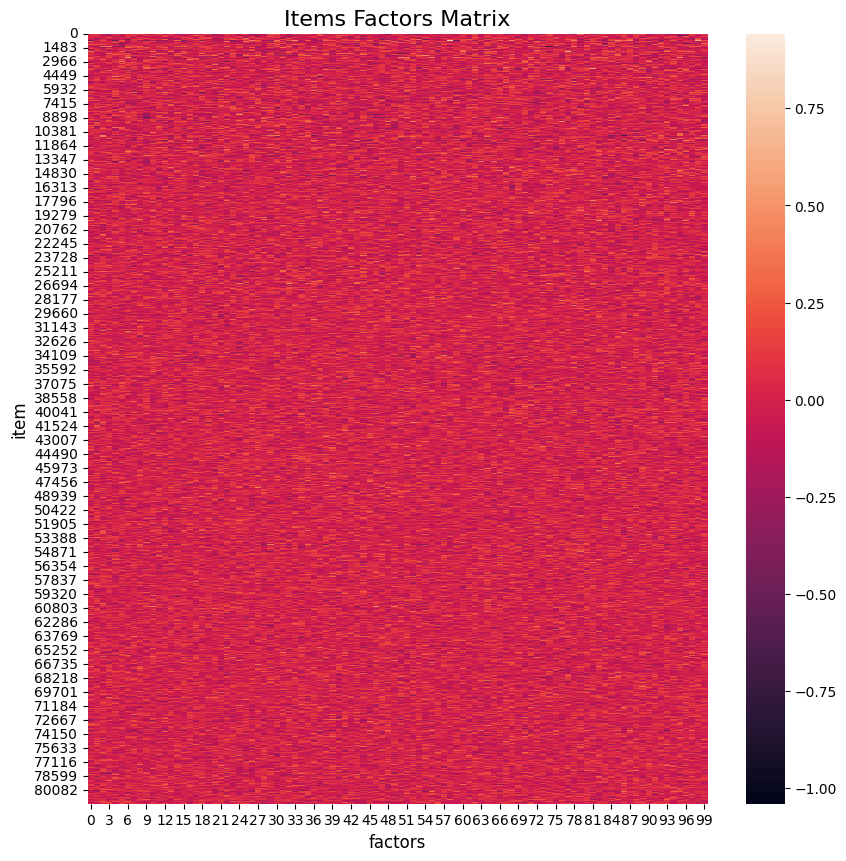

In [59]:
# Items factors matrix with 5 factors
qi = algo.qi

# Plot items factors
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(qi, ax=ax)
ax.set_title("Items Factors Matrix", fontsize = 16)
ax.set_xlabel('factors', fontsize = 12)
ax.set_ylabel('item', fontsize = 12)
plt.show()

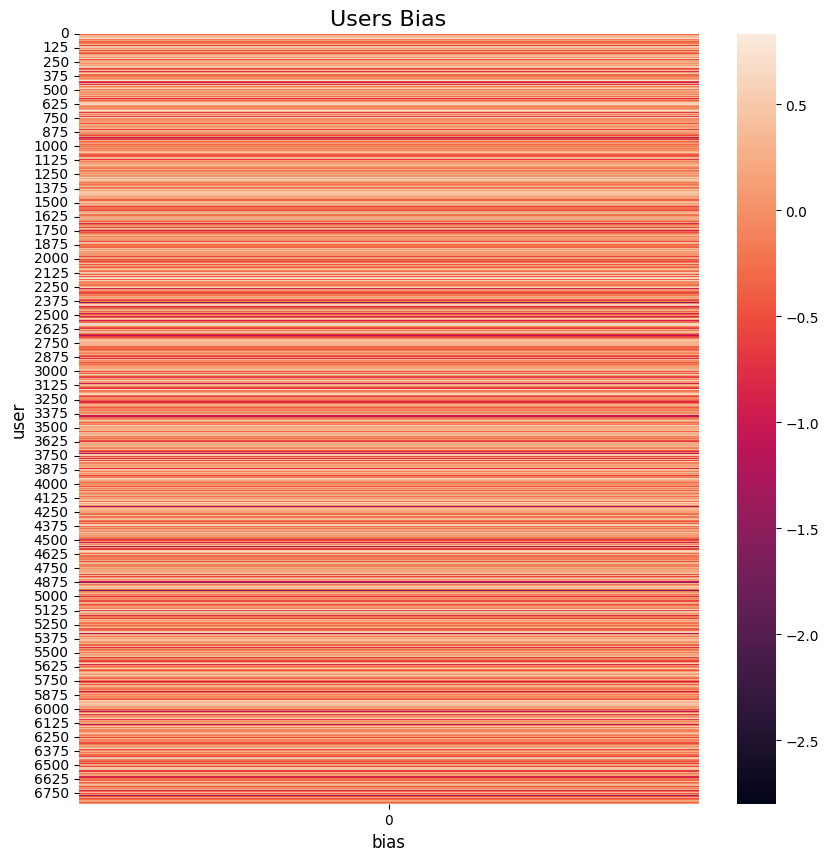

In [60]:
# Users bias
bu = algo.bu.reshape(algo.bu.shape[0], 1)

# Plot bias
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(bu, ax=ax)
ax.set_title("Users Bias", fontsize = 16)
ax.set_xlabel('bias', fontsize = 12)
ax.set_ylabel('user', fontsize = 12)
plt.show()

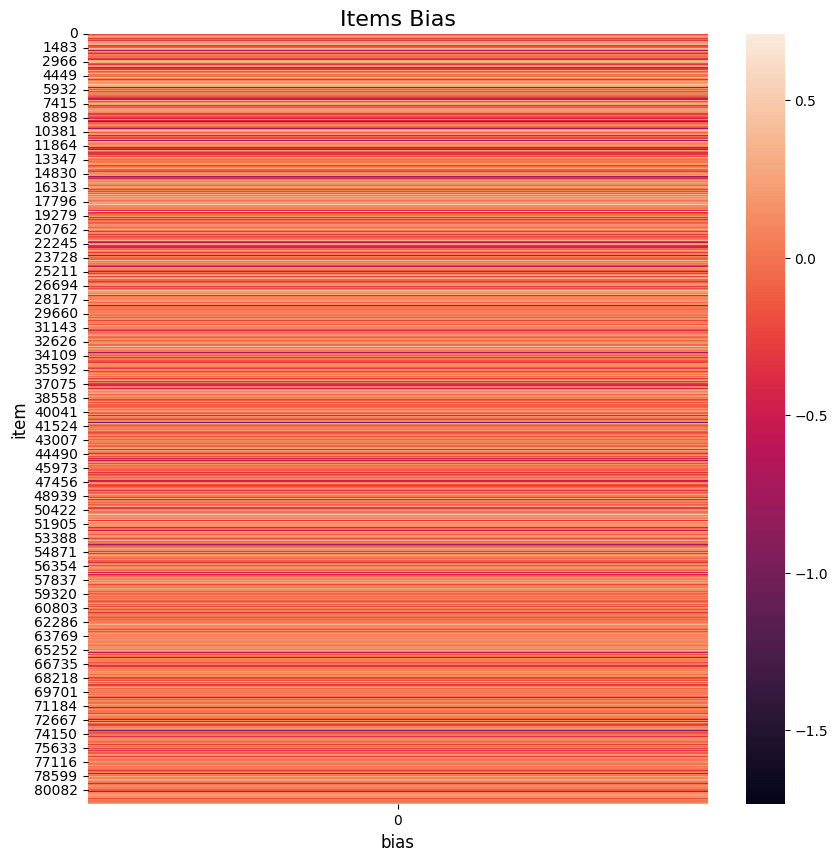

In [61]:
# Items bias
bi = algo.bi.reshape(algo.bi.shape[0], 1)

# Plot bias
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(bi, ax=ax)
ax.set_title("Items Bias", fontsize = 16)
ax.set_xlabel('bias', fontsize = 12)
ax.set_ylabel('item', fontsize = 12)
plt.show()